# Анализ данных игр для интернет-магазина "Стримчик" 

Заголовок: Анализ данных игр для интернет-магазина "Стримчик" 

Описание проекта: Интернет-магазина "Стримчик"  продаёт по всему миру компьютерные игры. Имея доступ к историческим данным о продажах игр, оценкам пользователей и критиков, а также информации о жанрах и платформах, мы стремимся выявить закономерности, определяющие успешность игр. Анализ данных поможет нам сделать ставку на потенциально популярный продукт и спланировать рекламную кампанию.

Цель исследования:  Наша цель - выявить факторы, влияющие на успешность игр в интернет-магазине "Стримчик", с использованием доступных исторических данных. Мы стремимся определить, какие характеристики игр, такие как жанр, платформа, рейтинг ESRB и другие, оказывают наибольшее влияние на объемы продаж.

Ход исследования: Исследование включает в себя следующие этапы:

- Подготовка данных на представленных датасетах (информация о играх);
- Исследовательский анализ данных о популярных жанрах, времени жизни консоли а также актуальных на сегодняшний день.
- Статистический анализ данных. Проверка гипотез по средней оценке пользователя на Xbox One и PC, отличаются ли cредний пользовательский рейтинг жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования».
- Интерпретация результатов анализа и формулирование выводов.

Общий вывод: С помощью данного исследования мы можем выявить потенциальные платформы для инвестирования, узнать, насколько еще выгодно вкладываться в существующие платформы, а также узнать среднестатисчического пользователя каждого региона.


Содержание
1. [Загрузка данных](#1) 
2. [Предобработка данных](#2) 
3. [Исследовательский анализ данных](#3) 
4. [Портрет пользователя каждого региона](#4) 
5. [Проверка гипотез](#5) 
6. [Вывод исследования](#6) 

<a id="1"></a> 
### Загрузка данных

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind as st
from scipy import stats as st
import seaborn as sns

In [2]:
data = pd.read_csv('/datasets/games.csv')

In [3]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [5]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


<a id="2"></a> 
### Предобработка данных

Приведем к нижнему регистру названия столбцов.

In [6]:
data = data.rename(str.lower, axis='columns')

Проверим количество пропусков в датасете:

In [7]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [8]:
(data.isna().mean() * 100).round(2)

name                0.01
platform            0.00
year_of_release     1.61
genre               0.01
na_sales            0.00
eu_sales            0.00
jp_sales            0.00
other_sales         0.00
critic_score       51.32
user_score         40.09
rating             40.48
dtype: float64

- name -  у нас имеются 2 пропуска с именем, удаляем данные, т.к.. Хоть одна из игр достаточно успешно продалась с продажей в почти 2 миллиона, эти данные могут нам помешать при выявлении успешно проданной игры за 1993 год. Удаляем данные.
- year_of_release - Замена даже для спортивных симуляторов предыдущим годом некоректоно, т.к. некоторые игры выпустились в год, который упоминается (например, PDC World Championship Darts 2008, Дата выхода - 25 января 2008 года). Промаркируем пропущенные значения -1, и в дальнейшем не будем их использовать в анализе.
- genre - имеются 2 пропуска в тех же строках, что и имя игры. Удалилиь вместе с теми строками.
- critic_score - Нет оценок у части игр, причин может быть несколько:
    - Игра новая, и оценки еще не успели выйти;
    - эта игра не так известна, что также влияет на выход оценок;
    - Оценка выходит за диапазон того, как оценивают игру; 
    - У игры нет оценки конкретно на эту платформ;
    - Данные не полностью подтянулись, что вполне вероятно - нет оценок у достаточно популярных игр (Super Mario Bros, Tetris, Duck Hunt и пр.). Лучше уточнить у разработчиков.
    
    Заполнить средним или медианной мы не можем, т.к. даже плохая игра при средней оценке может стать лучше только из-за замены средним и наоборот. Оставим как есть.
- user_score - Точно те же причины пропусков, что и у cтолбца critic_score, а также возможен вариант, что не было в то время оценки чисто от пользователей. Оставим как есть.
- rating - Также возможен вариант, что для того, чтобы получить оценку игры издателю нужно отправить анкету игры или ролик с геймплеем, но с учетом, что большую часть игр от независимых разработчиков, выпускаются в цифровом магазине, то и оценки нет. Средним/медианной заполнить не получится, т.к. для взрослой игры мы можем случайно дать рейтинг "E - для всех",ставить без рейтинга некоректно, оставим как есть, переименовав их в Misc. (от англ. "miscellaneous" - разнообразные, разные).

In [9]:
data = data.dropna(subset=['name'])

In [10]:
data['year_of_release'] = data['year_of_release'].fillna(-1)

In [11]:
data['rating'] = data['rating'].fillna('Misc')

Проверим на наличие явных и неявных дубликатов.

In [12]:
data.duplicated().sum()

0

Явных дубликатов нет.

Проверим на наличие неявных дубликатов. Проверим на столбцах name, genre, platform, rating, и, user_score.

In [13]:
data.loc[data.duplicated(subset=["name", "platform"], keep=False),:]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1745,Sonic the Hedgehog,PS3,2006.0,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+
4127,Sonic the Hedgehog,PS3,-1.0,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
11715,Need for Speed: Most Wanted,PC,2012.0,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


In [14]:
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [15]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [16]:
data['rating'].unique()

array(['E', 'Misc', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

Неявный дубликат у нас в имени. Need for Speed: Most Wanted имеет несколько версий игр 2005 и 2012 года под разные платформы- оставляем их. Madden NFL 13 и Sonic the Hedgehog выглядят как неявные дубликаты - удалим те строки, прибавив количество продаж с удаленных строк. Также неявный дубликат у нас в рейтинге, т.к. K-A действовал до 1998 года, и стал после известен как E - для всех. Переименуем его.

Проверим, насколько часто встречаются игры по рейтингу.

In [17]:
(
    data.query('year_of_release != -1').pivot_table(
        index='rating',
        values=['name'], 
        aggfunc='count')
    .sort_values('name',ascending=False)
)

,name
rating,
Misc,6676
E,3921
T,2905
M,1536
E10+,1393
EC,8
K-A,3
AO,1
RP,1


1 EC - игра только для взрослых, 1 RP- ожидает присвоения и 8 EC - Для детей младшего возраста. Заменим рейтинг EC на E, остальные удалим.

In [18]:
data['rating'] = data['rating'].replace(['K-A','EC'], 'E', regex=True).replace(['RP','AO'], np.NaN, regex=True)

In [19]:
data['rating'].unique()

array(['E', 'Misc', 'M', 'T', 'E10+', nan], dtype=object)

In [20]:
data = data.drop([4127,16230])

In [21]:
data.loc[604,'eu_sales'] = 0.23

In [22]:
data.loc[1745,'eu_sales'] = 0.54

In [23]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Misc
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Misc
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,Misc
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,Misc
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Misc
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,Misc


In [24]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Стоит заметить на аббревиатуру 'tbd' в столбце с оценкой пользователей. Аббревиатура на сайте metacritic.com указывает, что они не выставляют оценку, если к этой игре нет хотя бы 4 рецензий. Причин может быть несколько:
- Игра настолько неизвестна, что просто некому оставить отзыв;
- Нет доступа к сайту людям, которые хотят выставить оценку;
- Оценка пользователей есть, но не на конкретно этом сайте. Нужно уточнить источник датасета;
- Игроки находятся в других регионах, и им незачем оставлять рейтинг на metacritic. 

Можем оставить значение как есть, но т.к. эта аббревиатура равнозначно NaN, то и заменим его на NaN.

In [25]:
data['user_score'] = data['user_score'].replace('tbd', np.NaN)

In [26]:
data.query('user_score == "tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Приведем тип данных:
- year_of_release стоит привести к int, т.к. это года, а года не могут быть с плавающей запятой
- user_score - приведем к float, т.к. у нас имеются оценки с дробью,

In [27]:
data['year_of_release'] = data['year_of_release'].astype('int')

In [28]:
data['user_score'] = data['user_score'].astype('float')

Посчитаем суммарные продажи во всех регионах и запишем в столбец *total_sales*.

In [29]:
data['total_sales'] = (data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales'])

**Вывод:** мы предобработали данные:
- Заменили пропуска там, где это возможно;
- Заменили тип данных там, где это возможно;
- проверили на дубликаты.
- добавили новый столбец с общими продажами;

<a id="3"></a> 
### Исследовательский анализ данных

Посмотрим, сколько игр выпускалось в разные года.

Text(0, 0.5, 'Количество игр')

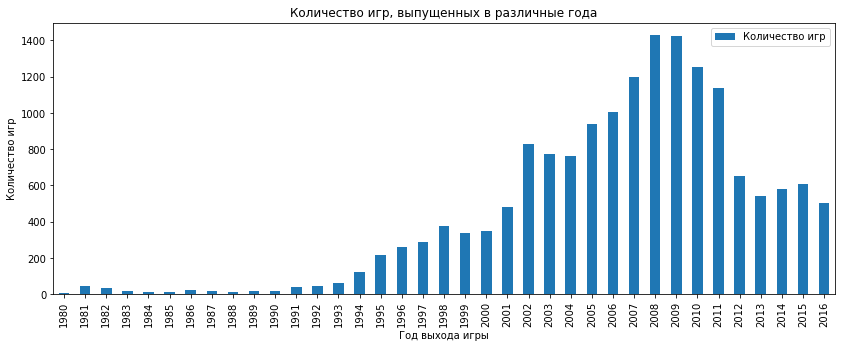

In [30]:
(
    data.query('year_of_release != -1').pivot_table(
        index='year_of_release',
        values=['name'], 
        aggfunc='count')
    .rename(columns={'name':'Количество игр'})
    .plot(kind='bar', figsize=(14,5))     
)
plt.title('Количество игр, выпущенных в различные года')
plt.xlabel('Год выхода игры')
plt.ylabel('Количество игр')

Самый пик выхода игр - 2005 по 2011 года. Это связано с большим разнообразием платформ, вышедших в эти года, крупными из них являются playstation, xbox 360, wii и созданием игр под них.

Посмотрим, как менялись продажи по платформам.

In [31]:
top_platform_sales = (
    data.query('year_of_release != -1').pivot_table(
        index='platform',
        values=['total_sales'], 
        aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
)
top_platform_sales

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.82
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Text(0, 0.5, 'Платформы')

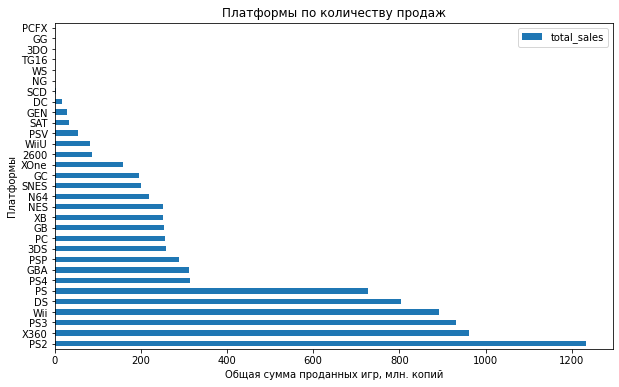

In [32]:
(
    top_platform_sales
    .plot.barh(figsize=(10,6))
)
plt.title('Платформы по количеству продаж')
plt.xlabel('Общая сумма проданных игр, млн. копий')
plt.ylabel('Платформы')

Возьмем данные топ-10 платформ по количеству продаж за весь период. Построим по ним среднее время жизни консоли за весь период

In [33]:
top10_platform = list(top_platform_sales.index[:10])
top10_platform

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS']

Text(0, 0.5, 'Общая сумма продаж, млн. копий')

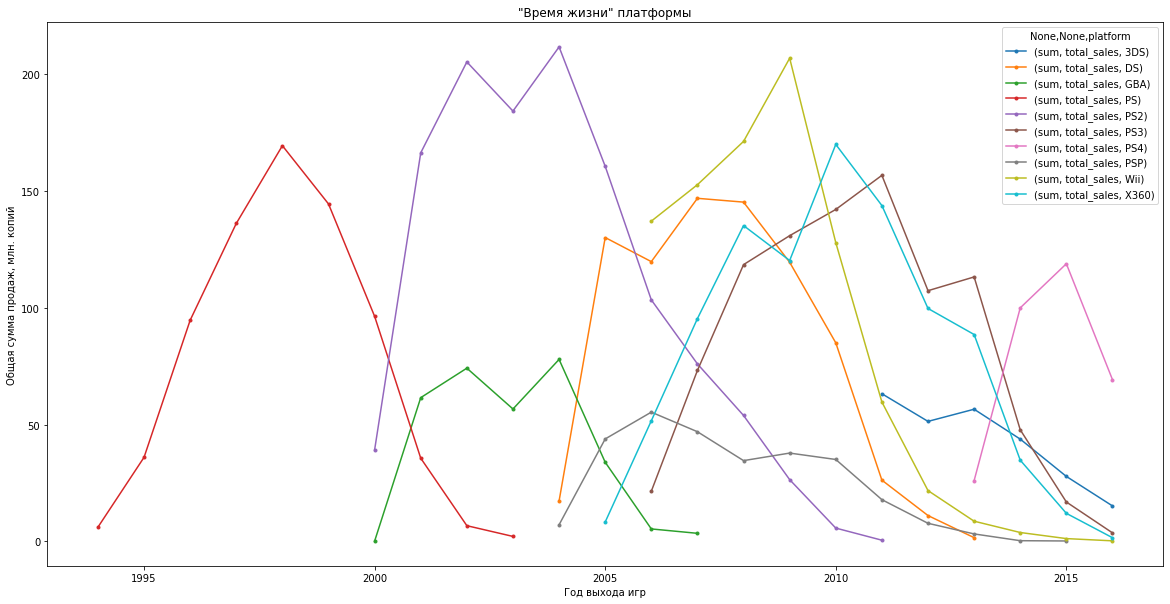

In [34]:
top_platforms_by_years =data.query('year_of_release > 1993 and platform == @top10_platform').pivot_table(
                                 index = ['year_of_release'],
                                 columns = ['platform'],
                                 values = ['total_sales'],
                                 aggfunc =  ['sum'])
top_platforms_by_years.plot.line(style='.-', figsize = (20,10),label='platform')
plt.title('"Время жизни" платформы')
plt.xlabel('Год выхода игр')
plt.ylabel('Общая сумма продаж, млн. копий')
#plt.show()

**Вывод:** В среднем консоли живут по 7 - 10 лет. Это объясняется техническим устареванием самой консоли.Появление новой консоли объясняется теми же причинами. Портативные платформы (за исключением DS) менее популярны, чем для домашнего пользования.  Пик продаж приходится через 2 - 3 года после появления консоли. Это может объясняться количеством игр, которые выпустили за время существования консоли. Для более наглядного исследования желательно разделить исследование платформ портативных и домашних.

Проверим какие на сегодняшний день актуальные платформы. Возьмем данные с 2015 по настоящие года, когда сегодняшние консоли уже вышли, но находятся на середине своей жизни.
Предыдущие года не учитываем.

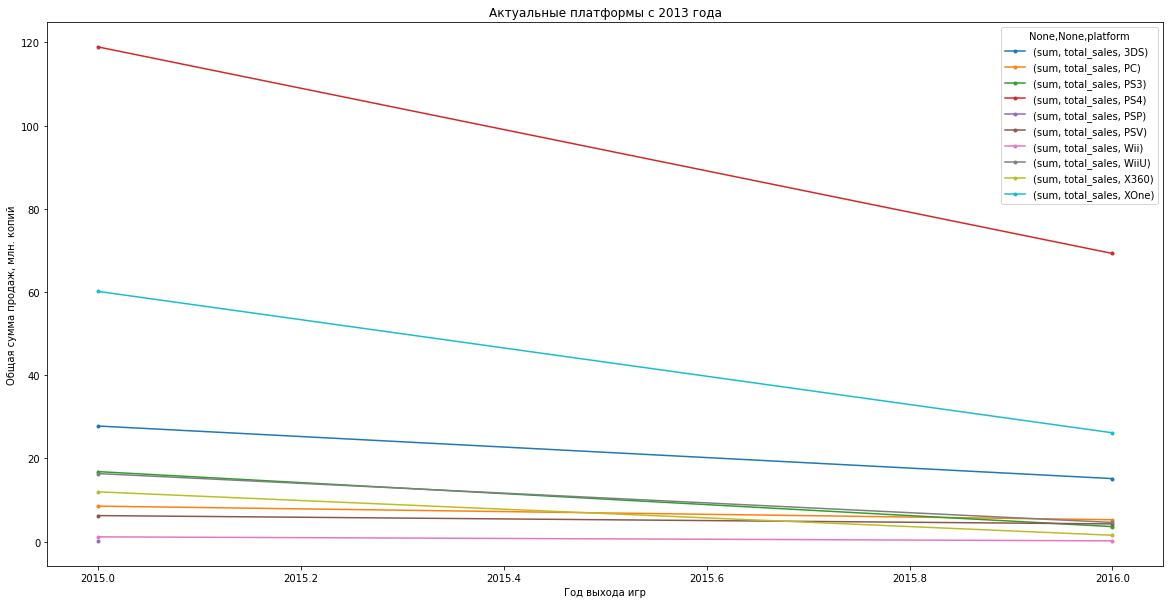

In [35]:
actual_platform = data.query('year_of_release >= 2015')
actual_platform_pivot_table = actual_platform.pivot_table(
                                 index = ['year_of_release'],
                                 columns = ['platform'],
                                 values = ['total_sales'],
                                 aggfunc =  ['sum'])
actual_platform_pivot_table.plot.line(style='.-', figsize = (20,10),label='platform')
plt.title('Актуальные платформы с 2013 года')
plt.xlabel('Год выхода игр')
plt.ylabel('Общая сумма продаж, млн. копий')
j = np.arange(11)

**Вывод:** По продажам игр лидируют:
- PS4
- XOne
- 3DS
- PC
- WiiU

На остальные консоли либо перестали производить игры (PSP,DS), либо их жизненный путь заканчивается, и в скором времени их заменят другими платформами. Также стоит отметить, что PC, как платформа, будет актуален всегда, хоть как игровая платформа и выходит дороже, и поэтому для составления рекламной стратегии не стоит упускать из виду(уточнение: для данного вывода нужно дополнительное исследование на цену платформ).

Постройм график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

(0.0, 1.75)

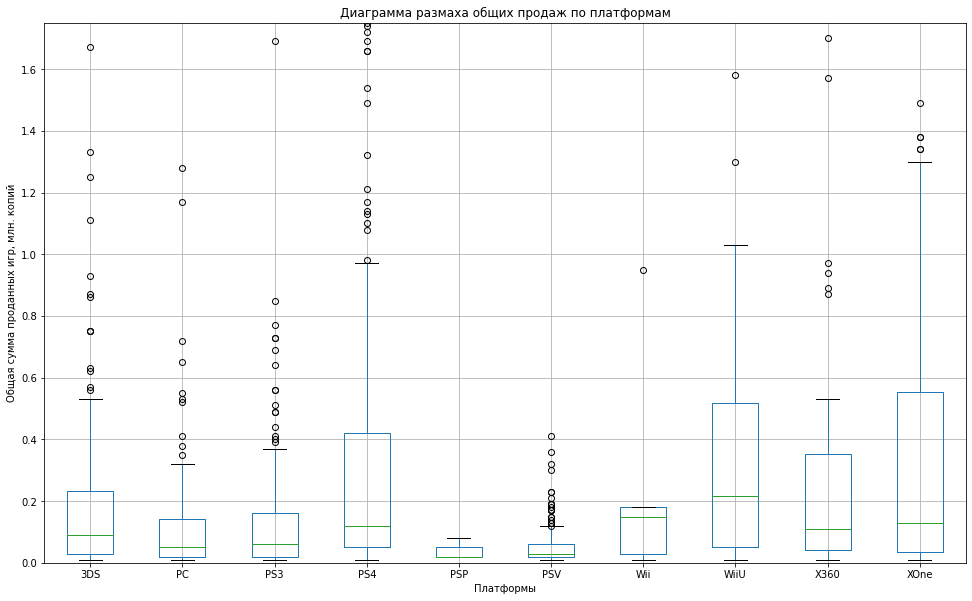

In [36]:
ax = (
    actual_platform
    .boxplot(
        column = ['total_sales'],
        by = ['platform'],
        figsize=(16, 10))
)
plt.suptitle('')
plt.title('Диаграмма размаха общих продаж по платформам')
plt.xlabel('Платформы')
plt.ylabel('Общая сумма проданных игр, млн. копий')
plt.ylim([0, 1.75])

**Вывод:** Медиана по топовым платформам варьируется от 100 до 250 тыс проданных копий за игру.
Верхняя граница предела, за которыми уже определяются аномалии, у двух платформ - PS3 и X360 - на уровне 1,7 млн копий.
У остальных - от 1 до 1,5 млн. копий.

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.

Возьмем в качестве популярной платформы PS4.

**PS4**

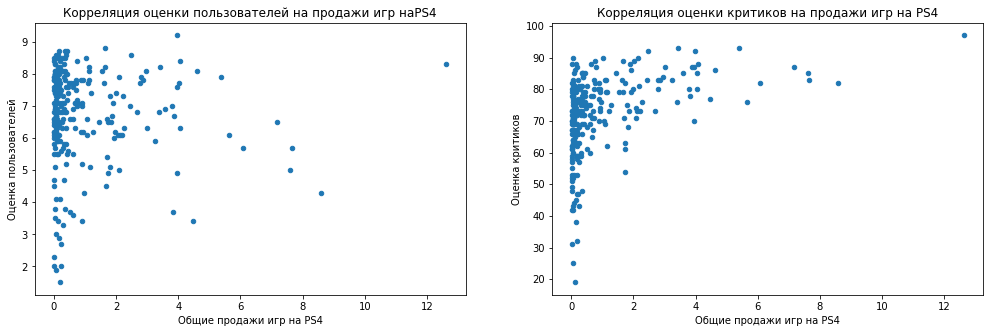

In [37]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(17,5)
ax1 = data.query('platform == "PS4"').plot(ax=ax1, x='total_sales', y='user_score', kind='scatter',title='Корреляция оценки пользователей на продажи игр наPS4',xlabel='Общие продажи игр на PS4', ylabel='Оценка пользователей') 
ax2 = data.query('platform == "PS4"').plot(ax=ax2, x='total_sales', y='critic_score', kind='scatter',title='Корреляция оценки критиков на продажи игр на PS4',xlabel='Общие продажи игр на PS4', ylabel='Оценка критиков') 

In [38]:
print('Корреляция оценки пользователей на продажи игр на PS4 - ',data.query('platform == "PS4"')['total_sales'].corr(data['user_score']))
print('Корреляция оценки критиков на продажи игр на PS4 - ',data.query('platform == "PS4"')['total_sales'].corr(data['critic_score']))

Корреляция оценки пользователей на продажи игр на PS4 -  -0.031957110204556376
Корреляция оценки критиков на продажи игр на PS4 -  0.406567902061781


**Вывод:** Практически нет влияния отзывов пользователей на продажи. Чуть более тесная связь между продажами и отзывами критиков. Это может быть связано, что критик в основном, более объективно выставляет оценку, в отличии от субъективной оценки пользователя. Также может быть связан из-за того, что игры, где выше бюджет, более качественны, и соответственно выше оценка, но не всегда так выходит. 

Посмотрим на влияние продаж от отзывов критика и отзывов пользователя на других популярных платформах.

**XBOX ONE**

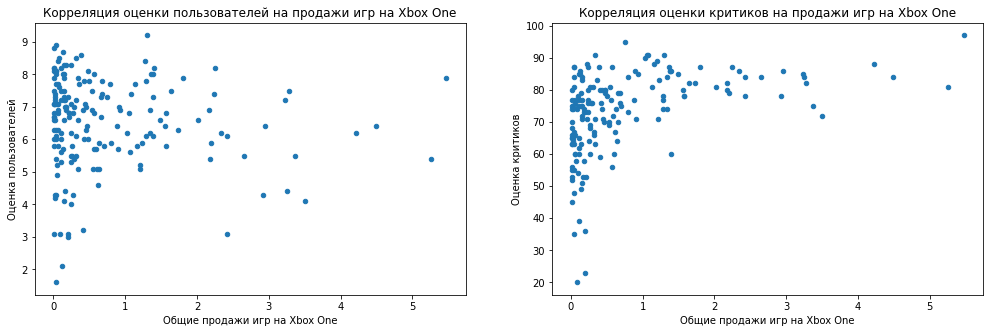

In [39]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(17,5)
ax1 = data.query('platform == "XOne"').plot(ax=ax1, x='total_sales', y='user_score', kind='scatter',title='Корреляция оценки пользователей на продажи игр на Xbox One',xlabel='Общие продажи игр на Xbox One', ylabel='Оценка пользователей') 
ax2 = data.query('platform == "XOne"').plot(ax=ax2, x='total_sales', y='critic_score', kind='scatter',title='Корреляция оценки критиков на продажи игр на Xbox One',xlabel='Общие продажи игр на Xbox One', ylabel='Оценка критиков') 

In [40]:
print('Корреляция оценки пользователей на продажи игр на XOne - ',data.query('platform == "XOne"')['total_sales'].corr(data['user_score']))
print('Корреляция оценки критиков на продажи игр на XOne - ',data.query('platform == "XOne"')['total_sales'].corr(data['critic_score']))

Корреляция оценки пользователей на продажи игр на XOne -  -0.06892505328279412
Корреляция оценки критиков на продажи игр на XOne -  0.41699832800840175


**Nintendo 3DS**

<AxesSubplot:title={'center':'Корреляция оценки критиков на продажи игр на 3DS'}, xlabel='Общие продажи игр на 3DS', ylabel='Оценка критиков'>

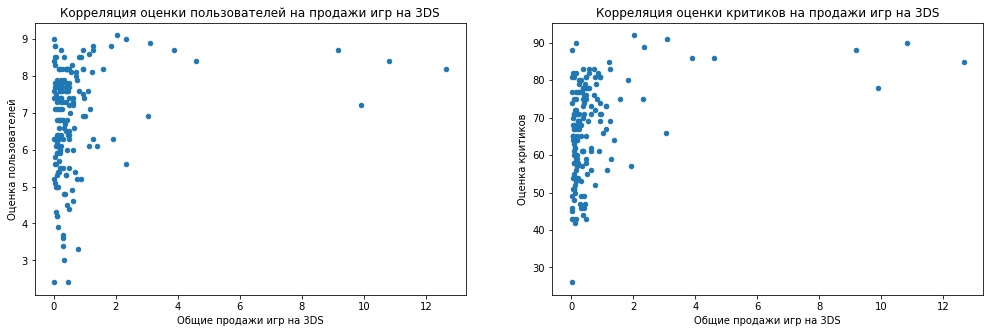

In [41]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(17,5)
data.query('platform == "3DS"').plot(ax=ax1, x='total_sales', y='user_score', kind='scatter',title='Корреляция оценки пользователей на продажи игр на 3DS',xlabel='Общие продажи игр на 3DS', ylabel='Оценка пользователей') 
data.query('platform == "3DS"').plot(ax=ax2, x='total_sales', y='critic_score', kind='scatter',title='Корреляция оценки критиков на продажи игр на 3DS',xlabel='Общие продажи игр на 3DS', ylabel='Оценка критиков') 

In [42]:
print('Корреляция оценки пользователей на продажи игр на 3DS - ',data.query('platform == "3DS"')['total_sales'].corr(data['user_score']))
print('Корреляция оценки критиков на продажи игр на 3DS - ',data.query('platform == "3DS"')['total_sales'].corr(data['critic_score']))

Корреляция оценки пользователей на продажи игр на 3DS -  0.22480798039571082
Корреляция оценки критиков на продажи игр на 3DS -  0.3494009303924131


**PC**

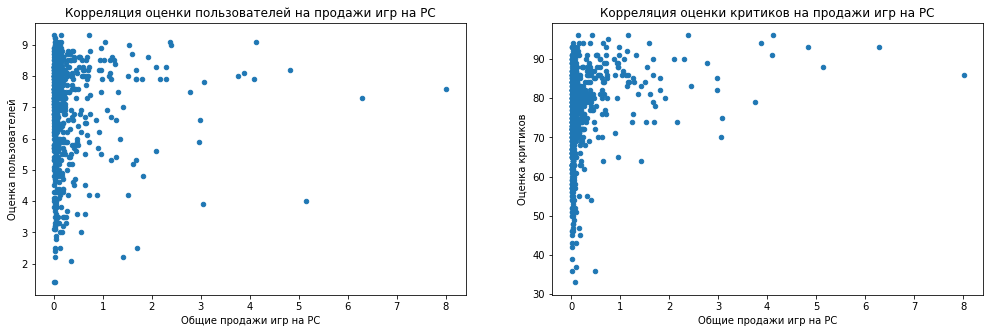

In [43]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(17,5)
ax1 = data.query('platform == "PC"').plot(ax=ax1, x='total_sales', y='user_score', kind='scatter',title='Корреляция оценки пользователей на продажи игр на PC',xlabel='Общие продажи игр на PC', ylabel='Оценка пользователей') 
ax2 = data.query('platform == "PC"').plot(ax=ax2, x='total_sales', y='critic_score', kind='scatter',title='Корреляция оценки критиков на продажи игр на PC',xlabel='Общие продажи игр на PC', ylabel='Оценка критиков') 

In [44]:
print('Корреляция оценки пользователей на продажи игр на PC - ',data.query('platform == "PC"')['total_sales'].corr(data['user_score']))
print('Корреляция оценки критиков на продажи игр на PC - ',data.query('platform == "PC"')['total_sales'].corr(data['critic_score']))

Корреляция оценки пользователей на продажи игр на PC -  0.010475684621486419
Корреляция оценки критиков на продажи игр на PC -  0.2568867378948212


**WiiU**

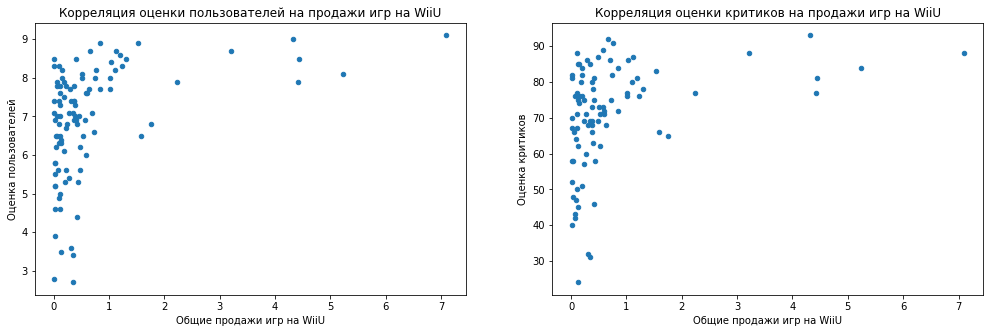

In [45]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(17,5)
ax1 = data.query('platform == "WiiU"').plot(ax=ax1, x='total_sales', y='user_score', kind='scatter',title='Корреляция оценки пользователей на продажи игр на WiiU',xlabel='Общие продажи игр на WiiU', ylabel='Оценка пользователей') 
ax2 = data.query('platform == "WiiU"').plot(ax=ax2, x='total_sales', y='critic_score', kind='scatter',title='Корреляция оценки критиков на продажи игр на WiiU',xlabel='Общие продажи игр на WiiU', ylabel='Оценка критиков') 

In [46]:
print('Корреляция оценки пользователей на продажи игр на WiiU - ',data.query('platform == "WiiU"')['total_sales'].corr(data['user_score']))
print('Корреляция оценки критиков на продажи игр на WiiU - ',data.query('platform == "WiiU"')['total_sales'].corr(data['critic_score']))

Корреляция оценки пользователей на продажи игр на WiiU -  0.4002190202148617
Корреляция оценки критиков на продажи игр на WiiU -  0.3483797601201749


**Вывод:** Ситуация та-же, что и с PS4, только связь продаж игр на 3DS и WiiU с оценкой пользователей чуть выше. Это может быть связана, что 3DS и WiiU - портативные консоли, и вместо отзыва в интернете от неизвестного человека, можно оценить игру непосредственно у самого пользователя консоли, играя вместе с ним.

Посмотрим на общее распределение игр по жанрам.

Text(0, 0.5, 'Жанры')

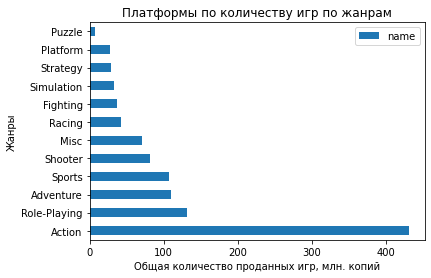

In [47]:
popular_genre = actual_platform.pivot_table(index='genre', values='name' ,aggfunc ='count').sort_values('name',ascending=False)
popular_genre.plot.barh()
plt.title('Платформы по количеству игр по жанрам')
plt.xlabel('Общая количество проданных игр, млн. копий')
plt.ylabel('Жанры')

Топ-3 по количеству игр по жанрам:
- Action
- Role-Playing
- Adventure

Построим диаграмму размаха продаж по жанрам.

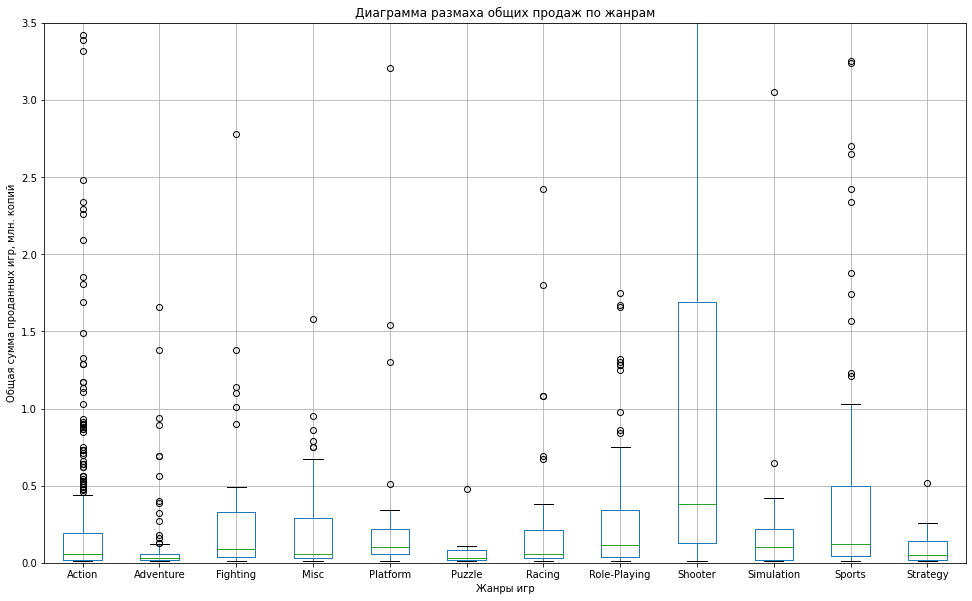

In [48]:
actual_platform.boxplot(column = ['total_sales'],by = ['genre'],figsize=(16, 10))
plt.suptitle('')
plt.title('Диаграмма размаха общих продаж по жанрам')
plt.xlabel('Жанры игр')
plt.ylabel('Общая сумма проданных игр, млн. копий')
plt.ylim([0, 3.5])
plt.show()

Хоть игр в жанре Action больше, данный жанр уступает Shooter по количеству проданных копий. Топ-3 по проданным копиям игр по жанрам:
- Shooter
- Sports
- Platform

<a id="4"></a> 
### Портрет пользователя каждого региона

Составим портрет пользователя каждого региона по следующим критериям:

    Самые популярные платформы (топ-5).
    Самые популярные жанры (топ-5).
    Влияет ли рейтинг ESRB на продажи в отдельном регионе?
    
Рейтинг ESRB имеет градацию:
- EC - от 3 лет
- E - от 6 лет
- E10+ - от 10 лет
- T - от 13 лет
- M - от 17 лет
- AO - от 18 лет
- RP - рейтинг ожидается

**Самые популярные платформы (топ-5)**

Text(0.5, 1.0, 'JP - регион')

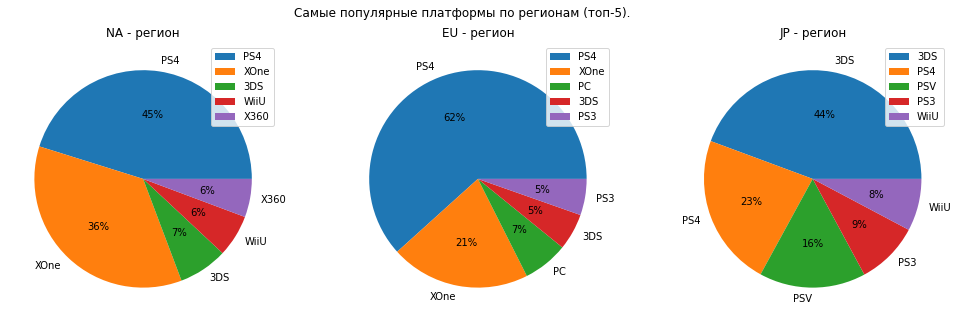

In [49]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_size_inches(17,5)
fig.suptitle('Самые популярные платформы по регионам (топ-5).')
(
    actual_platform
    .pivot_table(
        index='platform',
        values='na_sales',
        aggfunc='sum')
    .sort_values('na_sales',ascending=False)
    .head(5)
    .plot.pie(ax=ax1,ylabel='',autopct='%1.0f%%', subplots=True, figsize=(8,8))
)
(
    actual_platform
    .pivot_table(
        index='platform',
        values='eu_sales',
        aggfunc='sum')
    .sort_values('eu_sales',ascending=False)
    .head(5)
    .plot.pie(ax=ax2,ylabel='',autopct='%1.0f%%', subplots=True, figsize=(8,8))
)
(
    actual_platform
    .pivot_table(
        index='platform',
        values='jp_sales',
        aggfunc='sum')
    .sort_values('jp_sales',ascending=False)
    .head(5)
    .plot.pie(ax=ax3,ylabel='',autopct='%1.0f%%', subplots=True, figsize=(8,8))
)
ax1.set_title('NA - регион')
ax2.set_title('EU - регион')
ax3.set_title('JP - регион')

**Самые популярные жанры (топ-5)**

Text(0.5, 1.0, 'JP - регион')

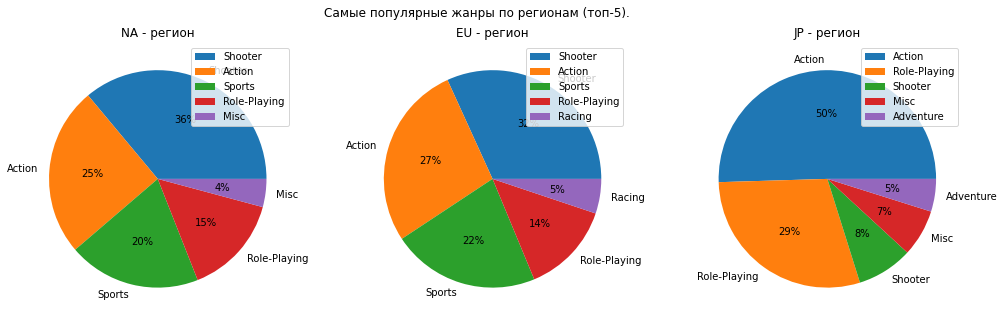

In [50]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_size_inches(17,5)
fig.suptitle('Самые популярные жанры по регионам (топ-5).')
(
    actual_platform
    .pivot_table(
        index='genre',
        values='na_sales',
        aggfunc='sum')
    .sort_values('na_sales',ascending=False)
    .head(5)
    .plot.pie(ax=ax1,ylabel='',autopct='%1.0f%%', subplots=True, figsize=(8,8))
)
(
    actual_platform
    .pivot_table(
        index='genre',
        values='eu_sales',
        aggfunc='sum')
    .sort_values('eu_sales',ascending=False)
    .head(5)
    .plot.pie(ax=ax2,ylabel='',autopct='%1.0f%%', subplots=True, figsize=(8,8))
)
(
    actual_platform
    .pivot_table(
        index='genre',
        values='jp_sales',
        aggfunc='sum')
    .sort_values('jp_sales',ascending=False)
    .head(5)
    .plot.pie(ax=ax3,ylabel='',autopct='%1.0f%%', subplots=True, figsize=(8,8))
)
ax1.set_title('NA - регион')
ax2.set_title('EU - регион')
ax3.set_title('JP - регион')

**Влияет ли рейтинг ESRB на продажи в отдельном регионе?**

Text(0.5, 1.0, 'JP - регион')

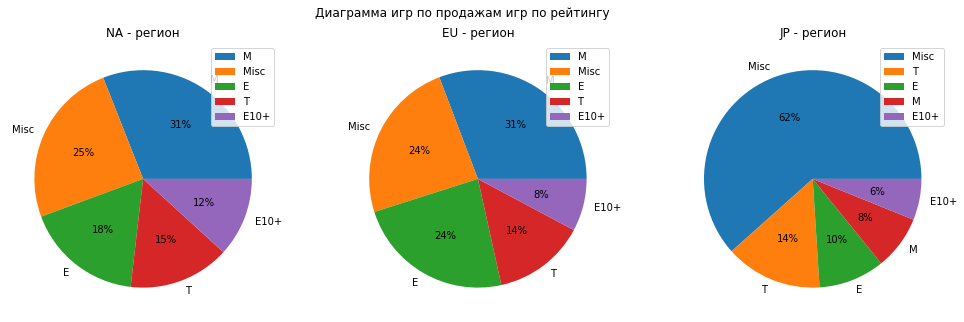

In [51]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_size_inches(17,5)
fig.suptitle('Диаграмма игр по продажам игр по рейтингу')
(
    actual_platform
    .pivot_table(
        index='rating',
        values='na_sales',
        aggfunc='sum')
    .sort_values('na_sales',ascending=False)
    .plot.pie(ax=ax1, ylabel='',autopct='%1.0f%%', subplots=True, figsize=(8,8))
)
(
    actual_platform
    .pivot_table(
        index='rating',
        values='eu_sales',
        aggfunc='sum')
    .sort_values('eu_sales',ascending=False)
    .plot.pie(ax=ax2, ylabel='',autopct='%1.0f%%', subplots=True, figsize=(8,8))
)
(
    actual_platform
    .pivot_table(
        index='rating',
        values='jp_sales',
        aggfunc='sum')
    .sort_values('jp_sales',ascending=False)
    .plot.pie(ax=ax3,ylabel='',autopct='%1.0f%%', subplots=True, figsize=(8,8))
)
ax1.set_title('NA - регион')
ax2.set_title('EU - регион')
ax3.set_title('JP - регион')

**Вывод:** Проведя анализ, по всем регионам доминирующей платформой стал PS4, большинство игроков предпочитают игры жанра Action. Отдельно по регионам можно составить портрет игрока:

- Американский игрок - Любит играть или на PS4, или на XOne, предпочитает игры жанров Action и Shooter, предпочитая игры для взрослых.
- Европейский игрок - Любит играть на PS4, или на PS3, предпочитает игры жанров Action и Shooter, предпочитая игры для взрослых.
- Японский игрок - Любит играть или на портативной консоле 3DS, или на PS4, предпочитает игры жанров Action и Role-playing , предпочитая игры либо только для взрослых, либо детские игры от 3+. Но это по европейским стандартам. В японии используется своя система рейтинга Computer Entertainment Rating Organizatio (CERO) - почти то же, что и ESRB, но для японского рынка, и соответственно, результат может отличается.

<a id="5"></a> 
### Проверка гипотез

Для проверки обеих гипотез будем использовать двусторонний t-критерий Стьюдента, т.к. в обоих случаях выборки независимы между собой.

**5.1 Проверим, одинаковы ли средние пользовательские рейтинги платформ Xbox One и PC?** <a id="5.1"></a> 

Гипотезы:

    H0: средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    H1: средние пользовательские рейтинги платформ Xbox One и PC разные.

Для проверки обеих гипотез будем использовать двусторонний t-критерий Стьюдента, т.к. в обоих случаях выборки независимы между собой.

In [52]:
xone = actual_platform.query('platform == "XOne" and user_score.isna() == False')['user_score']
pc = actual_platform.query('platform == "PC" and user_score.isna() == False')['user_score']

alpha = .05

results = st.ttest_ind(
    xone, 
    pc, 
    equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.2946308864003345
Не получилось отвергнуть нулевую гипотезу


Перепроверим результат:

In [53]:
xone_pc = actual_platform.query('platform == "XOne" or platform == "PC"')
xone_pc.pivot_table(index='platform', values='user_score', aggfunc='mean')

,user_score
platform,
PC,6.296429
XOne,6.542149


**Вывод:** У нас не получилось отвергнуть гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

**5.2 Проверим, разные ли средние пользовательские рейтинги жанров Action и Sports.**

Гипотезы:

    H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые.
    H1: Средние пользовательские рейтинги жанров Action и Sports разные.

In [54]:
action = actual_platform.query('genre == "Action" and user_score.isna() == False')['user_score']
sports = actual_platform.query('genre == "Sports" and user_score.isna() == False')['user_score']

alpha = .05

results = st.ttest_ind(
    action, 
    sports, 
    equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 5.97163549920592e-10
Отвергаем нулевую гипотезу


Перепроверим результат:

In [55]:
action_sports = actual_platform.query('genre == "Action" or genre == "Sports"')
action_sports.pivot_table(index='genre', values='user_score', aggfunc='mean')

,user_score
genre,
Action,6.80829
Sports,5.19878


**Вывод:** У нас не получилось отвергнуть гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC разные;

Вывод исследования](#6) 

При проведении анализа данных были выявлены следующие результаты:

- Самый насыщенные по количеству игр период с 2005 по 2011 года.
- В среднем консоли живут по 7 - 10 лет.
- На сегодняшний день актуальными платформами являются: PS4, XOne и 3DS, PC и WiiU. PC как платформа, будет актуальна всегда, но за ней нет мощной рекламной стратегии, т.к. PC - это больше для рутинных и рабочих задач.
- По всем регионам самой популярной консолью является PS4. Американские и европейские игроки предпочитают взрослые игры Action и Shooters, на консолях XboxOne и PS4, в то время как японские игроки больше предпочитают портативную консоль 3DS и PS4 и взрослые игры жанров Role-playing и Action

В результате проведенного исследования были подтверждены следующие гипотезы:

- С вероятностью 5% средние пользовательские рейтинги жанров Action и Sports отличаются.
- Cредние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Рекомендации рекламному отделу:
Для составления рекламных предложений могу предложить следующие рекомендации:
- Делать акцент на нынешние консоли, в особенности Xbox One и PC;
- Увеличить рекламу игр жанров Action и Shooters, можно добавить для насыщения рынка игры жанров Sports и Role-playing;
- Устроить распродажи игр для платформ, у которых подходит к концку срок жизни, например Wii, WiiU или Xbox360.